In [1]:
%%html
<!-- The customized css for the slides -->
<link rel="stylesheet" type="text/css" href="../styles/python-programming-introduction.css"/>
<link rel="stylesheet" type="text/css" href="../styles/basic.css"/>
<link rel="stylesheet" type="text/css" href="../../assets/styles/basic.css" />

# Kernel method

- Support Vector Machines (SVM)

## Outline

* The Why of Support Vector Machines
    - Maximizing the _Margin_
* The How of Support Vector Machines
* Beyond linear boundaries: Kernel SVM
* SVM v.s. logistic regression

## The Why of Support Vector Machines

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns
sns.set()

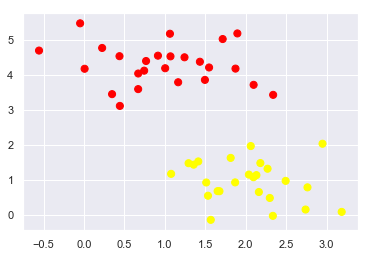

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

## How to draw the separator  line? (1/2)

- A linear discriminant classifier may draw straight lines to separate two sets of data.
- But there may be multiple split lines that perfectly distinguish between the two categories.

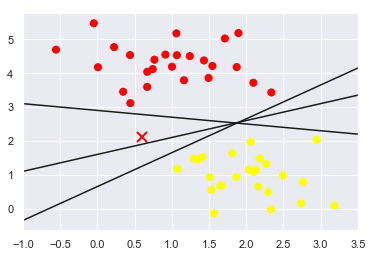

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

## How to draw the separator  line? (2/2)

- All three separators are good if we want to distinguish between these samples
- Which one is the best?
- We do need to think a bit deeper!

## Support Vector Machines: Maximizing the _Margin_
- SVM proposes a new solution algorithm which finds the nearest straight line by applying an appropriate boundary fill to each line
- Because of its excellent fitting ability, SVM can also be used to handle large amounts of unbalanced data

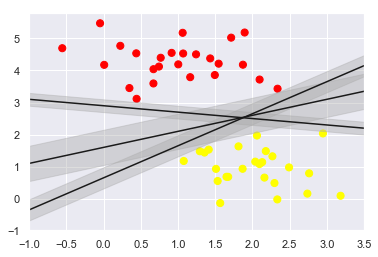

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

## SVM for Linear classification : 2D case

![](../images/svm/svm2d.png)

## SVM for Linear classification : 3D case

![](../images/svm/svm3d.gif)

## sklearn

In [6]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y);

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

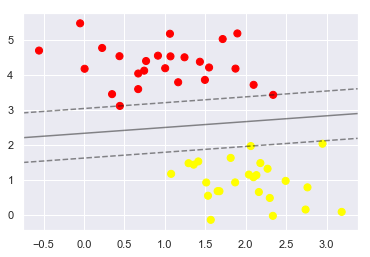

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [8]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

## Insensitivity to distant points

One of the strengths of the SVM model is that it is insensitive to the exact behaviour of distant points, and increases the number of training points without affecting the classification results of the model.

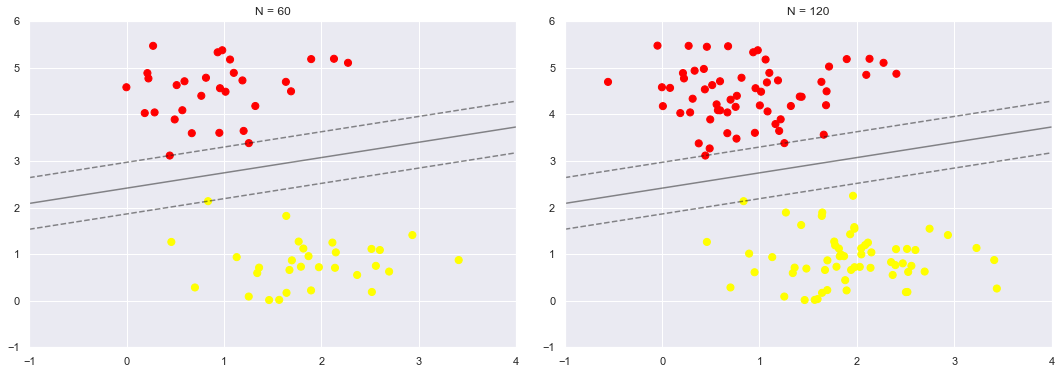

In [9]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

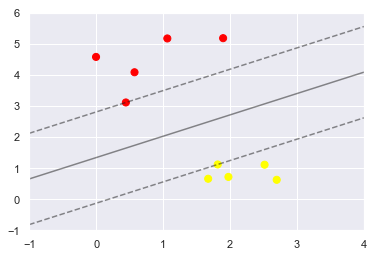

In [10]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None));

## Beyond linear boundaries: Kernel SVM

![](../images/svm/svm1.gif)

## Non-linearly separable data

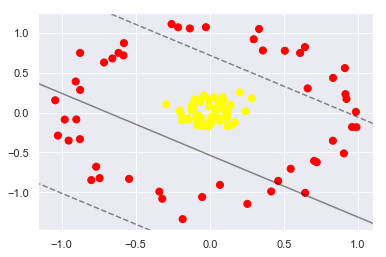

In [11]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

## Now let's do the kernel trick

In [12]:
r = np.exp(-(X ** 2).sum(1))

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

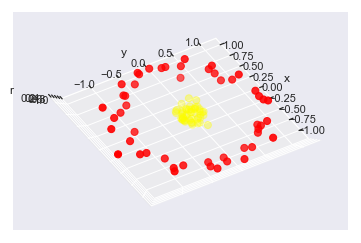

In [13]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

In [14]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y);

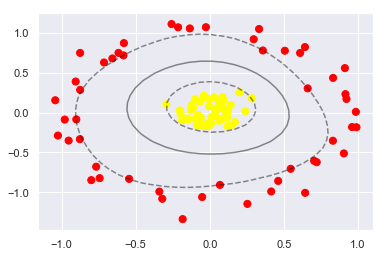

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none');

## SVM v.s. logistic regression (1/2)

- Support vector machines only consider local points near the interval boundary, whereas logistic regression considers the global (points far from the boundary line also play a role in determining the boundary line). Support vector machines do not cause changes in the separation hyperplane by changing the non-support vector samples


## SVM v.s. logistic regression (2/2)

- SVM’s loss function is self-regularising, which is why SVM is a structural risk minimisation algorithm. And LR must additionally add a regular term to the loss function. Structural risk minimisation, meaning seeking a balance between training error and model complexity to prevent overfitting
- Optimization methods: LR is generally based on gradient descent, SVM on SMO
- For non-linear separable problems, SVM is more scalable than LR

## Acknowledgement

Some code comes from [jakevdp](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html), for which the code part is licenced under MIT licence.